In [ ]:
# Figure 3, synthesis manuscipt

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob as glob

In [2]:
inp_blu = sns.color_palette("bright")[0]
syn_blnd_org = sns.color_palette("bright")[1]
palette=[inp_blu,syn_blnd_org]

In [3]:
# 25 experimental replicates
# Subsampling threshold of 40
reps = '25'
thresh = '40'

In [5]:
data_paths = sorted(
    glob.glob('plot_data/*'))

In [25]:
len_tbl = pd.read_csv(
    'data_stats_frame.tsv',
    sep = '\t')
len_tbl.drop(10, inplace=True)
len_tbl.reset_index(inplace=True, drop = True)

In [ ]:
index_list = [2] # BRCA

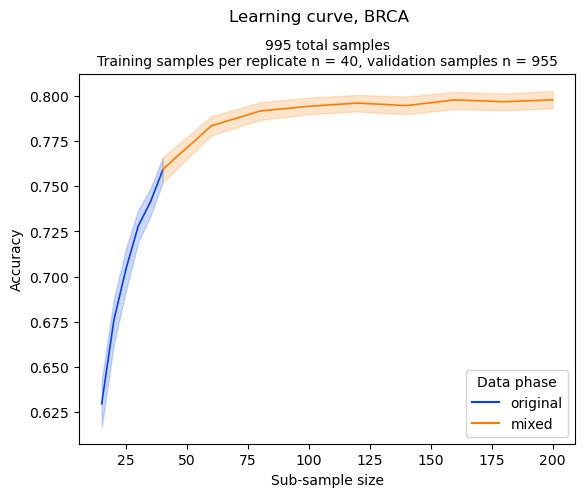

In [29]:
figure_size = (6, 6)
figure_dpi = 300
suptitle_y = 1.015
epochs = 4
for cancer in index_list:
    replicate_frame = pd.read_csv(data_paths[cancer], sep = '\t', index_col = 0)
    replicate_frame.columns = ['replicate',	'Data phase',	'Sub-sample size',	'Accuracy']

    sns.lineplot(x='Sub-sample size', y='Accuracy',
                hue='Data phase', palette=palette,
                data=replicate_frame, linewidth = 1.2)
    
    plt.suptitle('Learning curve, ' + replicate_frame.index.name, y = suptitle_y)
    val_len = len_tbl.iloc[cancer, :][1] - int(thresh)
    
    plt.title(str(len_tbl.iloc[cancer, :][1])+' total samples' + 
              '\nTraining samples per replicate n = '+thresh+
              ', validation samples n = '+str(val_len),
              fontsize = 10)
    plt.savefig(replicate_frame.index.name+'_reps.'+reps+'at'+thresh+
                '_latent.250_feat-set.'+feat_set+'_tcga-trn.'+epochs+'.png', bbox_inches = 'tight',
               dpi = figure_dpi)